              precision    recall  f1-score   support

    Abnormal       0.44      0.47      0.45      3754
Inconclusive       0.45      0.44      0.44      3617
      Normal       0.45      0.42      0.44      3729

    accuracy                           0.44     11100
   macro avg       0.44      0.44      0.44     11100
weighted avg       0.44      0.44      0.44     11100



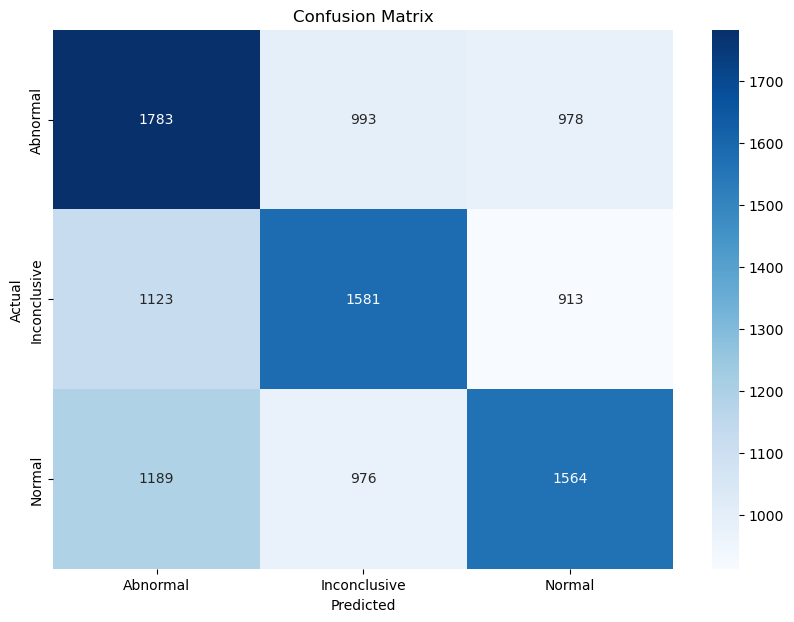

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('cleaned_healthcare_data.csv')

# Preprocessing
X = df.drop(['Test Results', 'Name', 'Date of Admission', 'Discharge Date'], axis=1)
y = df['Test Results']

# Column transformer
categorical_features = ['Gender', 'Blood Type', 'Medical Condition', 
                       'Doctor', 'Hospital', 'Insurance Provider',
                       'Admission Type', 'Medication']
numerical_features = ['Age', 'Billing Amount', 'Room Number', 'Length of Stay']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced'))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()